In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from yt_tools.need import *
from yt_tools.yt_cartesian_3D import cartesian_data

In [3]:
instance = cartesian_data('./japan', sample_level=1)

yt : [WARNING  ] 2024-11-24 23:36:53,112 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-11-24 23:36:53,185 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-24 23:36:53,187 Parameters: domain_dimensions         = [60 60 60]
yt : [INFO     ] 2024-11-24 23:36:53,188 Parameters: domain_left_edge          = [-3. -3.  0.]
yt : [INFO     ] 2024-11-24 23:36:53,190 Parameters: domain_right_edge         = [3. 3. 6.]
yt : [INFO     ] 2024-11-24 23:36:53,191 Parameters: cosmological_simulation   = 0


Initialization completed in 0.16412615776062012 seconds


# Surface QSL

In [25]:
instance = cartesian_data('./japan', sample_level=4)

yt : [WARNING  ] 2024-11-07 02:04:04,592 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-11-07 02:04:04,632 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-07 02:04:04,633 Parameters: domain_dimensions         = [60 60 60]
yt : [INFO     ] 2024-11-07 02:04:04,634 Parameters: domain_left_edge          = [-3. -3.  0.]
yt : [INFO     ] 2024-11-07 02:04:04,636 Parameters: domain_right_edge         = [3. 3. 6.]
yt : [INFO     ] 2024-11-07 02:04:04,637 Parameters: cosmological_simulation   = 0


Initialization completed in 0.20071887969970703 seconds


In [26]:
bbox = instance.bbox
nxyz = instance.dimensions*instance.sample_level
dxyz = (instance.bbox[:,1]-instance.bbox[:,0])/(nxyz-1)
nx,ny,nz=nxyz
xx = np.linspace(bbox[0,0],bbox[0,1],nx)
yy = np.linspace(bbox[1,0],bbox[1,1],ny)
zz = np.linspace(bbox[2,0],bbox[2,1],nz)
X,Y,Z = np.meshgrid(xx,yy,zz[0:1], indexing='ij')
boundary_points = np.stack([X.flatten(),Y.flatten(),Z.flatten()], axis=1)
PY  = '/home/aiia/.conda/envs/zzsolar/bin/python'
qsl = instance.parallel_qsl(boundary_points, step_size=10*dxyz.min(),python=PY, print_interval=10000, n_cores=80)

Instance saved to cartesian_data.pkl


yt : [WARNING  ] 2024-11-07 02:04:23,610 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-11-07 02:04:23,663 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-07 02:04:23,663 Parameters: domain_dimensions         = [60 60 60]
yt : [INFO     ] 2024-11-07 02:04:23,663 Parameters: domain_left_edge          = [-3. -3.  0.]
yt : [INFO     ] 2024-11-07 02:04:23,663 Parameters: domain_right_edge         = [3. 3. 6.]
yt : [INFO     ] 2024-11-07 02:04:23,663 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-11-07 02:04:23,863 e not found and no parfile passed, can not set thermal_pressure.


### =========== Parallel computing ============ ###
#       Available CPU cores:  96                  #
#            Used CPU cores:  80                  #
### =========================================== ###
Initialization OK
Assigning task OK
Progress:      1/57600 tasks completed.  Wall_time:  0.026 min
Progress:  10000/57600 tasks completed.  Wall_time:  0.498 min
Progress:  20000/57600 tasks completed.  Wall_time:  0.971 min
Progress:  30000/57600 tasks completed.  Wall_time:  1.441 min
Progress:  40000/57600 tasks completed.  Wall_time:  1.913 min
Progress:  50000/57600 tasks completed.  Wall_time:  2.391 min
Progress:  57600/57600 tasks completed.  Wall_time:  2.733 min
!!! Code Ending !!!


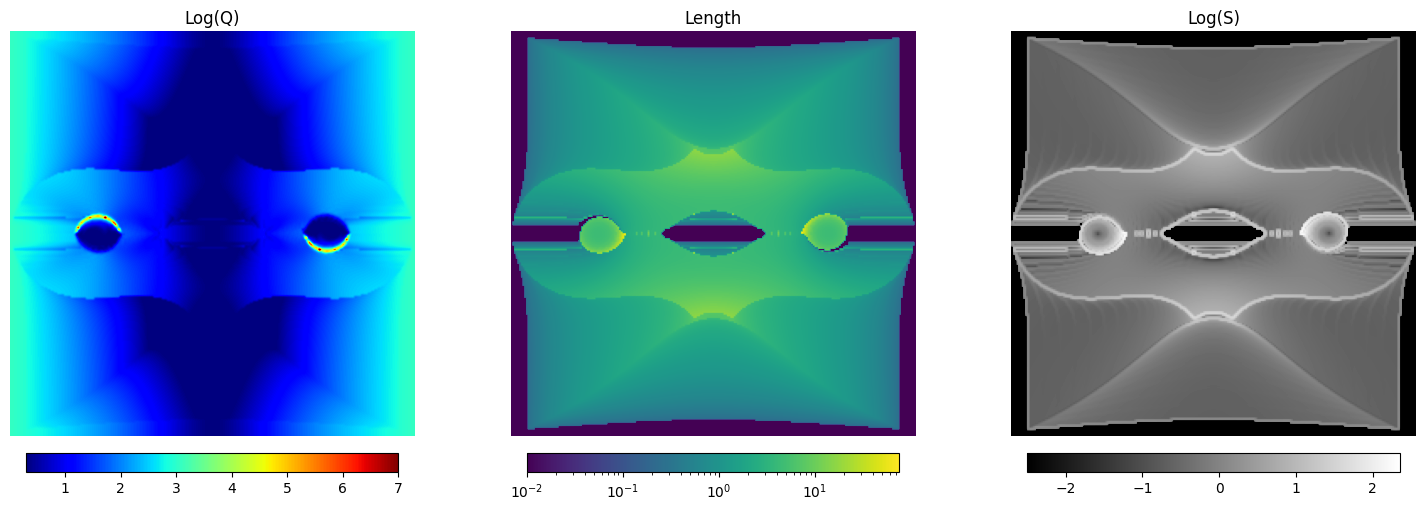

In [40]:
instance.plot2D_QSL(qsl,nx=nx,ny=ny,
                    Llim=dict(min=1e-2),
                    Qlim=dict(max=7),
                    Slim=dict(min=-2.5)
                   )

In [33]:
X,Y,Z = np.meshgrid(xx,np.array([0]),zz, indexing='ij')
boundary_points = np.stack([X.flatten(),Y.flatten(),Z.flatten()], axis=1)
qsl2 = instance.parallel_qsl(boundary_points, 
                             step_size=20*dxyz.min(),
                             python=PY, 
                             print_interval=10000, 
                             n_cores=80)

Instance saved to cartesian_data.pkl


yt : [WARNING  ] 2024-11-07 09:53:13,479 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-11-07 09:53:13,537 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-07 09:53:13,537 Parameters: domain_dimensions         = [60 60 60]
yt : [INFO     ] 2024-11-07 09:53:13,537 Parameters: domain_left_edge          = [-3. -3.  0.]
yt : [INFO     ] 2024-11-07 09:53:13,537 Parameters: domain_right_edge         = [3. 3. 6.]
yt : [INFO     ] 2024-11-07 09:53:13,537 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-11-07 09:53:13,757 e not found and no parfile passed, can not set thermal_pressure.


### =========== Parallel computing ============ ###
#       Available CPU cores:  96                  #
#            Used CPU cores:  80                  #
### =========================================== ###
Initialization OK
Assigning task OK
Progress:      1/57600 tasks completed.  Wall_time:  0.028 min
Progress:  10000/57600 tasks completed.  Wall_time:  0.433 min
Progress:  20000/57600 tasks completed.  Wall_time:  0.831 min
Progress:  30000/57600 tasks completed.  Wall_time:  1.241 min
Progress:  40000/57600 tasks completed.  Wall_time:  1.642 min
Progress:  50000/57600 tasks completed.  Wall_time:  2.049 min
Progress:  57600/57600 tasks completed.  Wall_time:  2.328 min
!!! Code Ending !!!


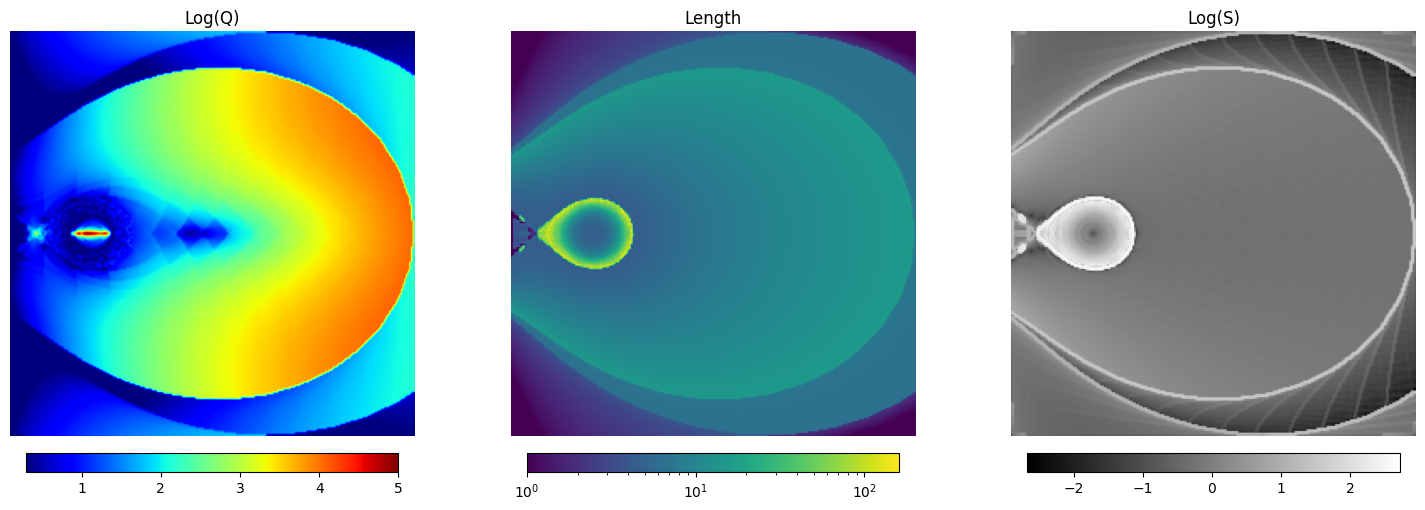

In [34]:
instance.plot2D_QSL(qsl2,nx=nx,ny=nz,
                    Llim=dict(min=1e-0),
                    Qlim=dict(max=5)
                   )

# Volume QSL

In [4]:
bbox = instance.bbox
nxyz = instance.dimensions*instance.sample_level
dxyz = (instance.bbox[:,1]-instance.bbox[:,0])/(nxyz-1)
PY  = '/home/aiia/.conda/envs/zzsolar/bin/python'
logQ,length,smoothed_Q, smoothed_L = instance.volume_qsl_task(
    step_size=5*dxyz.min(),
    python=PY, 
    print_interval=5000, 
    n_cores=80
)

Instance saved to cartesian_data.pkl


yt : [WARNING  ] 2024-11-24 23:37:51,013 'staggered' flag was found, but is currently ignored (unsupported)
yt : [INFO     ] 2024-11-24 23:37:51,083 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-11-24 23:37:51,083 Parameters: domain_dimensions         = [60 60 60]
yt : [INFO     ] 2024-11-24 23:37:51,083 Parameters: domain_left_edge          = [-3. -3.  0.]
yt : [INFO     ] 2024-11-24 23:37:51,083 Parameters: domain_right_edge         = [3. 3. 6.]
yt : [INFO     ] 2024-11-24 23:37:51,084 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2024-11-24 23:37:51,388 e not found and no parfile passed, can not set thermal_pressure.


### ======================================================= ###
###           Parallel Computing Domain QSL                 ###
###           Available CPU cores:  96                      ###
###                Used CPU cores:  80                      ###
### ======================================================= ###
 ## =================== Layer:0001/0060 =================== ## 
  # Progress:      1/3600,  Wall_time:  0.020 min
  # Progress:   3600/3600,  Wall_time:  0.092 min
 ## =================== Layer:0002/0060 =================== ## 
  # Progress:      1/3584,  Wall_time:  0.130 min
  # Progress:   3584/3584,  Wall_time:  0.220 min
 ## =================== Layer:0003/0060 =================== ## 
  # Progress:      1/3049,  Wall_time:  0.261 min
  # Progress:   3049/3049,  Wall_time:  0.377 min
 ## =================== Layer:0004/0060 =================== ## 
  # Progress:      1/2788,  Wall_time:  0.404 min
  # Progress:   2788/2788,  Wall_time:  0.488 min
 ## =================== 

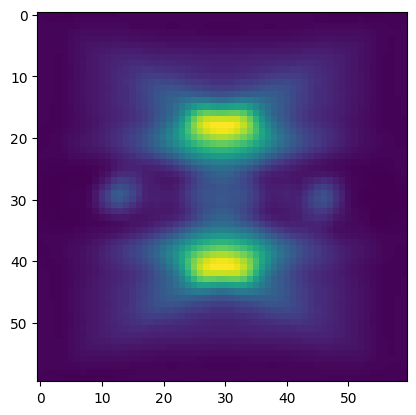

In [6]:
test = np.abs(logQ)
# test = np.where(test<np.log10(2),np.log10(2),test)
plt.imshow(smoothed_Q[:,:,0])
plt.show()